In [2]:
import os
import tarfile
import urllib.request

# Configuration for the data download
data_url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
local_filename = "aclImdb_v1.tar.gz"

# Function to download the dataset
def download_dataset(url, filename):
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)

# Function to extract files from a tar.gz archive
def extract_data(filename):
    with tarfile.open(filename, mode='r:gz') as archive:
        archive.extractall()

# Executing the download and extraction process
download_dataset(data_url, local_filename)
extract_data(local_filename)

In [3]:
import os
import pandas as pd

def read_text_files(directory, sentiment):
    data = []
    for file in os.listdir(directory):
        if file.endswith('.txt'):
            with open(os.path.join(directory, file), 'r', encoding='utf-8') as f:
                data.append((f.read(), sentiment))
    return data

def create_dataframe(data_directory):
    combined_data = []
    for sentiment in ['pos', 'neg']:
        sentiment_dir = os.path.join(data_directory, sentiment)
        combined_data.extend(read_text_files(sentiment_dir, sentiment))
    return pd.DataFrame(combined_data, columns=['text', 'label'])

# Load and create DataFrame for training and testing data
train_data_directory = 'aclImdb/train'  # Path to the training data
test_data_directory = 'aclImdb/test'  # Path to the testing data

train_df = create_dataframe(train_data_directory)
test_df = create_dataframe(test_data_directory)


In [4]:
from sklearn.preprocessing import LabelEncoder

# Function to apply label encoding to a DataFrame
def encode_labels(dataframe, encoder, column_name='label'):
    if not hasattr(encoder, 'classes_'):  # Check if encoder has been fitted
        dataframe[f'{column_name}_encoded'] = encoder.fit_transform(dataframe[column_name])
    else:
        dataframe[f'{column_name}_encoded'] = encoder.transform(dataframe[column_name])

# Initialize a label encoder
encoder = LabelEncoder()

# Apply the label encoding to both the training and testing datasets
encode_labels(df, encoder, 'label')
encode_labels(dftest, encoder, 'label')

# Both dataframes now have a 'label_encoded' column with numerical labels


In [5]:
print(df.head())

,text,label,label_encoded
0,For a movie that gets no respect there sure ar...,pos,1
1,Bizarre horror movie filled with famous faces ...,pos,1
2,"A solid, if unremarkable film. Matthau, as Ein...",pos,1
3,It's a strange feeling to sit alone in a theat...,pos,1
4,"You probably all already know this by now, but...",pos,1


In [6]:
print(dftest)

                                                    text label  label_encoded
0      Based on an actual story, John Boorman shows t...   pos              1
1      This is a gem. As a Film Four production - the...   pos              1
2      I really like this show. It has drama, romance...   pos              1
3      This is the best 3-D experience Disney has at ...   pos              1
4      Of the Korean movies I've seen, only three had...   pos              1
...                                                  ...   ...            ...
24995  With actors like Depardieu and Richard it is r...   neg              0
24996  If you like to get a couple of fleeting glimps...   neg              0
24997  When something can be anything you want it to ...   neg              0
24998  I had heard good things about "States of Grace...   neg              0
24999  Well, this movie actually did have one redeemi...   neg              0

[25000 rows x 3 columns]


In [7]:
unique_labels = df['label'].unique()
print(unique_labels)

array(['pos', 'neg'], dtype=object)

In [8]:
print(dftest)

                                                    text label  label_encoded
0      Based on an actual story, John Boorman shows t...   pos              1
1      This is a gem. As a Film Four production - the...   pos              1
2      I really like this show. It has drama, romance...   pos              1
3      This is the best 3-D experience Disney has at ...   pos              1
4      Of the Korean movies I've seen, only three had...   pos              1
...                                                  ...   ...            ...
24995  With actors like Depardieu and Richard it is r...   neg              0
24996  If you like to get a couple of fleeting glimps...   neg              0
24997  When something can be anything you want it to ...   neg              0
24998  I had heard good things about "States of Grace...   neg              0
24999  Well, this movie actually did have one redeemi...   neg              0

[25000 rows x 3 columns]


In [9]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
             "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 
             'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
             'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 
             'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
             "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 
             'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
             'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 
             'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
             'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 
             'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
             'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
             'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
             'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
             'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm',
             'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
             "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', 
             "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [10]:
import re

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove mentions and hashtags (in case of tweets or similar texts)
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove punctuation and extra whitespace
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)
    
    return text


In [11]:
trainDataPreprocess = df.copy()
trainDataPreprocess['text'] = trainDataPreprocess['text'].apply(preprocess)
# Print the processed text to verify changes
print(trainDataPreprocess['text']);

0        movie gets respect sure lot memorable quotes l...
1        bizarre horror movie filled famous faces stole...
2        solid unremarkable film matthau einstein wonde...
3        strange feeling sit alone theater occupied par...
4        probably already know 5 additional episodes ne...
                               ...                        
24995    comments may bit spoiler worth stop care enoug...
24996    saucy misadventures four au pairs arrive londo...
24997    oh italians assuming movies aristocrats weird ...
24998    eight academy nominations beyond belief think ...
24999    dislike childrens movies tearjerker redeeming ...
Name: text, Length: 25000, dtype: object


In [12]:
print(trainDataPreprocess)

                                                    text label  label_encoded
0      movie gets respect sure lot memorable quotes l...   pos              1
1      bizarre horror movie filled famous faces stole...   pos              1
2      solid unremarkable film matthau einstein wonde...   pos              1
3      strange feeling sit alone theater occupied par...   pos              1
4      probably already know 5 additional episodes ne...   pos              1
...                                                  ...   ...            ...
24995  comments may bit spoiler worth stop care enoug...   neg              0
24996  saucy misadventures four au pairs arrive londo...   neg              0
24997  oh italians assuming movies aristocrats weird ...   neg              0
24998  eight academy nominations beyond belief think ...   neg              0
24999  dislike childrens movies tearjerker redeeming ...   neg              0

[25000 rows x 3 columns]


In [13]:
import pandas as pd
from sklearn.utils import shuffle


trainDataPreprocess = shuffle(trainDataPreprocess)
trainDataPreprocess.reset_index(drop=True, inplace=True)
# Print the first few rows of the shuffled DataFrame
print(trainDataPreprocess.head())

                                                text label  label_encoded
0  im watching star world network overseas buys a...   pos              1
1  undoubtedly best heavy metal horror item made ...   pos              1
2  hey arnold slowpaced slightly boring movie plo...   neg              0
3  movie like bad train wreck horrible still cont...   neg              0
4  first lets agree lorenzo lamas could never con...   neg              0


In [14]:
testDataPreprocess = dftest.copy()
testDataPreprocess['text'] = testDataPreprocess['text'].apply(preprocess)

import pandas as pd
from sklearn.utils import shuffle


testDataPreprocess = shuffle(testDataPreprocess)
testDataPreprocess.reset_index(drop=True, inplace=True)
# Print the first few rows of the shuffled and preprocessed DataFrame
print(testDataPreprocess.head())

                                                text label  label_encoded
0  william shakespeares plays classified comedy t...   pos              1
1  perhaps movie little long still charm 45 years...   pos              1
2  admittedly put model airplane black background...   neg              0
3  many us find art agreeable masterpiece touches...   pos              1
4  typically im comedy guy rented video store com...   pos              1


In [15]:
import re
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Lemmatize text
    words = text.split()  # Split text into words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize each word
    return ' '.join(lemmatized_words)  # Join words back to text

# Apply the clean_text function to the 'text' columns
trainDataPreprocess['text'] = trainDataPreprocess['text'].apply(clean_text)
testDataPreprocess['text'] = testDataPreprocess['text'].apply(clean_text)

In [16]:
trainDataPreprocess['text']

0        im watching star world network overseas buys a...
1        undoubtedly best heavy metal horror item made ...
2        hey arnold slowpaced slightly boring movie plo...
3        movie like bad train wreck horrible still cont...
4        first lets agree lorenzo lamas could never con...
                               ...                        
24995    cheapest film made 21st century way low qualit...
24996    movie contains personalities deliciously playi...
24997    read great interest available comment made min...
24998    usually dont write reviews cant understand rat...
24999    show incredibly hilarious couldnt stop watchin...
Name: text, Length: 25000, dtype: object

In [17]:
# Calculate the total number of unique words across all text entries in the DataFrame
all_words = trainDataPreprocess['text'].str.split()  # Split each text into words
unique_words = set(word for sublist in all_words for word in sublist)  # Flatten the list of lists and create a set of unique words
count_unique_words = len(unique_words)  # Count the number of unique words

print(count_unique_words)  # Print the count of unique words

24902


In [18]:
df_combined = pd.concat([df, dftest], ignore_index=True)

In [19]:
df_combined['label'].unique()

array(['pos', 'neg'], dtype=object)

In [20]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [39]:
all_words = trainDataPreprocess['text'].str.split().explode()  # Split each text into words and flatten into one long series
uniqueWords = set(all_words)  # Convert to set to get unique words
countUnique = len(uniqueWords)  # Count unique words
print(countUnique)

24902


In [22]:
from collections import Counter
from keras.preprocessing.text import Tokenizer

max_features = 10000

# Get top 10,000 most occurring words in the list
results = Counter()
trainDataPreprocess['text'].str.split().apply(results.update)
vocabulary = [word for word, _ in results.most_common(max_features)]

# Create tokenizer based on your top 10,000 words
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(trainDataPreprocess['text'])  # Fit on the actual texts

# Now the tokenizer is ready to be used for converting text to sequences

In [23]:
import numpy as np

# Function to convert labels to integer codes
def labels_to_codes(dataframe):
    return np.int32(dataframe.label.astype('category').cat.codes.to_numpy())

# Convert training and testing labels
y = labels_to_codes(trainDataPreprocess)
ytest = labels_to_codes(testDataPreprocess)

# Determine the number of classes (assuming consistent labels across datasets)
num_classes = len(np.unique(np.concatenate([y, ytest])))

# Print results
print("ytest (test labels):", ytest)

[1 1 0 ... 1 0 1]
[1 1 0 ... 1 0 0]


In [24]:
combined_data = pd.concat([trainDataPreprocess['text'], testDataPreprocess['text']], ignore_index=True)
print(combined_data)

0        im watching star world network overseas buys a...
1        undoubtedly best heavy metal horror item made ...
2        hey arnold slowpaced slightly boring movie plo...
3        movie like bad train wreck horrible still cont...
4        first lets agree lorenzo lamas could never con...
                               ...                        
49995    film produced producers releasing corp prc amo...
49996    oh man movie amazing good story man isnt accep...
49997    charge feather river routine western u cavalry...
49998    legendary pop star steve alaimo dont let sun c...
49999    disclaimer ventures foreign cinema taken likin...
Name: text, Length: 50000, dtype: object


In [25]:
X = tokenizer.texts_to_sequences(trainDataPreprocess['text'].values)
X = pad_sequences(X)
print(X)

Xtest = tokenizer.texts_to_sequences(testDataPreprocess['text'].values)
Xtest = pad_sequences(Xtest)
print(Xtest)

[[   0    0    0 ...   30 1019  198]
 [   0    0    0 ... 7181  204 2664]
 [   0    0    0 ...  647   44  651]
 ...
 [   0    0    0 ...  819   27  410]
 [   0    0    0 ...  277  212   37]
 [   0    0    0 ... 1670  239 5763]]
[[   0    0    0 ... 5313  586 4192]
 [   0    0    0 ... 5894  140  301]
 [   0    0    0 ...  367  339  730]
 ...
 [   0    0    0 ...  333 3457 5033]
 [   0    0    0 ... 1974 2514  224]
 [   0    0    0 ... 1526  230  284]]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import re
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [33]:
output_dim = 16
max_input_length = X.shape[1]

# Define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=max_features, output_dim=output_dim))
model.add(Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])


In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (8, 1133, 16)          │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (8, 1129, 128)         │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (8, 1129, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (8, 128)               │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (8, 16)                │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (8, 2)                 │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517,400 (1.97 MB)

 Trainable params: 172,466 (673.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344,934 (1.32 MB)

In [35]:
history_1 = model.fit(X_train, y_train,batch_size=8,epochs=7, validation_data=(X_val, y_val))

Epoch 1/7
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.6345 - val_loss: 0.6878
Epoch 2/7
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6741 - loss: 0.6616 - val_accuracy: 0.7803 - val_loss: 0.5275
Epoch 3/7
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8328 - loss: 0.4623 - val_accuracy: 0.8605 - val_loss: 0.3599
Epoch 4/7
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8909 - loss: 0.3060 - val_accuracy: 0.8848 - val_loss: 0.3108
Epoch 5/7
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9064 - loss: 0.2489 - val_accuracy: 0.8870 - val_loss: 0.2913
Epoch 6/7
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9204 - loss: 0.2222 - val_accuracy: 0.8892 - val_loss: 0.2867
Epoch 7/7
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9313 - loss: 0.1923 - val_accuracy: 0.8947 - val_loss: 0.2838


In [36]:
probabilities = model.predict(X_test)

pred = np.argmax(probabilities, axis=1)

print(" ")
print("Results")

accuracy = accuracy_score(y_test, pred)
accuracy = round(accuracy,1)

print('Accuracy: {:.2f}'.format(accuracy))
print(" ")
print(classification_report(y_test, pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 
Results
Accuracy: 0.90
 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2463
           1       0.88      0.89      0.89      2537

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



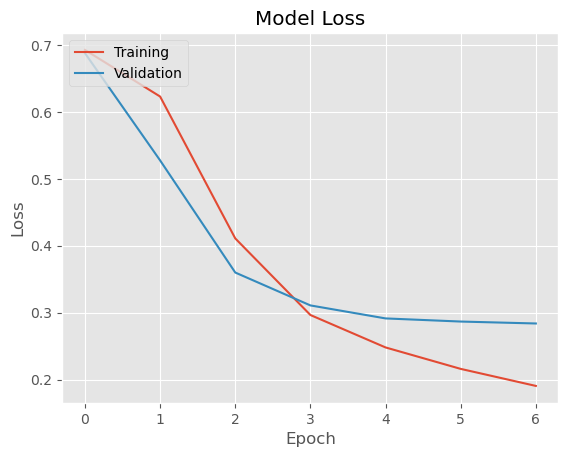

In [37]:
from matplotlib import pyplot as plt
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

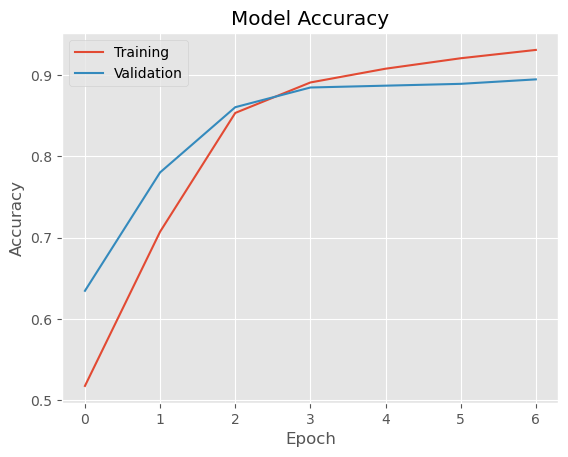

In [38]:
from matplotlib import pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()